In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_scores_val.csv' , header=0)
train.drop(columns=['rel_type'], inplace=True)
train

,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#label,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,true_triple
0,1.390461e-16,2.022144e-09,1.723389e-15,1.686923e-13,8.797799e-11,4.820794e-08,4.101536e-08,4.054872e-12,7.577471e-10,3.193485e-04,1.0
1,7.769395e-18,9.269042e-09,9.277287e-16,2.822336e-12,9.127231e-10,3.271483e-08,1.297195e-07,1.459238e-12,3.891724e-08,5.482596e-03,1.0
2,9.381931e-21,1.260345e-12,2.533955e-18,3.766882e-16,3.138146e-13,2.445664e-13,8.000954e-12,1.718058e-16,2.202536e-12,4.351150e-06,1.0
3,9.624895e-11,1.401421e-07,1.800882e-10,2.432747e-07,1.276196e-05,5.773820e-01,7.143231e-08,1.922280e-13,1.114032e-06,6.695654e-06,0.0
4,8.980259e-18,1.425727e-09,1.264181e-16,7.146914e-11,4.413531e-10,1.747594e-05,7.362392e-09,2.288004e-13,5.467836e-08,1.467091e-05,1.0
...,...,...,...,...,...,...,...,...,...,...,...
234137,1.229546e-17,6.919032e-09,2.298910e-16,4.578273e-12,5.369236e-10,9.068614e-10,3.044238e-08,7.133577e-16,3.327396e-08,1.743223e-04,0.0
234138,1.928937e-19,1.661600e-09,1.274581e-17,2.727026e-12,2.053241e-11,7.465712e-11,2.907225e-09,2.081199e-16,6.355764e-10,7.167623e-05,1.0
234139,8.608478e-16,4.379825e-08,4.330948e-14,2.884387e-12,2.634657e-09,1.799625e-05,3.820267e-08,5.058671e-14,6.640151e-08,7.224494e-06,1.0
234140,5.686351e-28,7.202888e-18,5.765508e-28,7.974873e-19,4.766921e-19,1.164702e-16,3.423171e-16,2.025809e-18,3.418671e-15,4.055928e-10,1.0


In [3]:
# Validation set
val = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_scores_test.csv' , header=0)
val.drop(columns=['rel_type'], inplace=True)
val

,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#label,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,true_triple
0,3.321381e-33,1.383637e-21,2.483230e-32,1.455230e-22,6.548166e-22,1.463533e-19,5.420684e-18,1.897750e-18,8.134990e-18,4.384205e-15,1.0
1,1.811332e-23,2.763797e-15,1.775541e-21,6.342205e-20,4.313551e-15,4.980899e-14,1.970257e-10,5.644733e-14,3.116356e-13,3.078375e-10,0.0
2,7.447356e-21,4.160307e-11,5.582756e-19,2.302747e-15,6.746490e-13,1.658670e-14,7.288072e-10,1.252752e-14,4.998973e-10,6.126306e-06,1.0
3,1.860074e-16,2.402229e-07,5.719892e-15,5.299638e-12,2.562623e-10,9.687995e-11,1.275443e-08,5.860161e-15,1.271677e-09,1.525240e-04,0.0
4,7.575236e-20,9.644912e-10,1.224949e-17,6.552931e-13,1.783159e-11,2.654347e-10,1.313196e-09,2.183876e-15,4.490240e-10,7.618663e-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...
233779,3.970005e-18,2.674709e-08,5.398218e-16,5.807440e-15,5.888175e-10,1.911851e-10,7.034750e-09,3.717835e-14,3.635154e-11,4.616353e-05,1.0
233780,1.035747e-21,7.316265e-13,2.709900e-19,2.990407e-15,3.468044e-16,6.197404e-16,2.939952e-13,1.038115e-16,7.710044e-12,1.571479e-07,0.0
233781,2.422918e-21,5.694059e-12,4.622286e-19,4.217616e-15,1.993609e-13,1.525600e-12,7.879751e-12,7.616485e-16,1.604063e-11,4.809562e-06,1.0
233782,2.813098e-23,4.349494e-13,3.981768e-21,2.200106e-15,5.172997e-14,6.115773e-15,5.186557e-12,8.830882e-19,7.972586e-13,9.617531e-08,0.0


In [4]:
# Embeddings validation set set
embval = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_scores_train.csv' , header=0)
embval.drop(columns=['true_triple'], inplace=True)
embval

,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#label,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,rel_type
0,1.497328e-16,8.569161e-07,1.161128e-14,1.399443e-08,1.813081e-08,2.255108e-08,6.415973e-09,7.192457e-17,4.774428e-08,1.876987e-05,no_link_known
1,1.396785e-12,1.321590e-07,7.981567e-12,1.049748e-07,2.958315e-05,9.661645e-01,1.031275e-06,1.249553e-11,5.501635e-07,7.726856e-07,http://www.semanticweb.org/needed-terms#004
2,2.951753e-08,4.282211e-07,2.633518e-08,9.968404e-01,1.507903e-07,2.604848e-08,4.399697e-10,3.064637e-17,1.079021e-07,1.920667e-07,http://www.semanticweb.org/needed-terms#001
3,6.367520e-18,4.467859e-09,2.037887e-16,2.491686e-12,3.889536e-11,2.549497e-11,8.331496e-11,1.189124e-16,1.271881e-09,2.059001e-06,no_link_known
4,7.834637e-17,1.116862e-08,4.115093e-15,2.181649e-11,6.802968e-10,1.408699e-08,4.864297e-08,6.059204e-15,5.930753e-08,1.609413e-04,no_link_known
...,...,...,...,...,...,...,...,...,...,...,...
2364605,8.843830e-11,3.234868e-07,1.589840e-10,9.974289e-01,1.905666e-09,6.355330e-09,5.855505e-10,4.633466e-17,2.122450e-08,1.094249e-08,http://www.semanticweb.org/needed-terms#001
2364606,5.623784e-07,9.999132e-01,1.664809e-05,1.607382e-04,1.812429e-04,8.377070e-05,3.958140e-05,1.741982e-14,1.312027e-05,2.209004e-04,http://semanticscience.org/resource/SIO_000628
2364607,1.937978e-13,1.520086e-07,4.637242e-13,3.125826e-05,1.286510e-10,2.009951e-08,5.496570e-08,4.623210e-16,6.332945e-09,1.270808e-07,no_link_known
2364608,1.929130e-17,7.256036e-09,4.399048e-15,9.591672e-14,1.796910e-09,7.746436e-09,8.305990e-09,9.257812e-15,1.410007e-09,4.340066e-05,no_link_known


In [5]:
# Experiment setup
s = setup(train, target = 'true_triple', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,7572
1,Target,true_triple
2,Target type,Binary
3,Original data shape,"(234142, 11)"
4,Transformed data shape,"(234142, 11)"
5,Transformed train set shape,"(187313, 11)"
6,Transformed test set shape,"(46829, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [6]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5790,0.6117,0.6449,0.5698,0.6050,0.1580,0.1594
1,0.5810,0.6119,0.6455,0.5717,0.6064,0.1620,0.1633
2,0.5826,0.6188,0.6406,0.5740,0.6055,0.1652,0.1663
3,0.5796,0.6119,0.6448,0.5704,0.6053,0.1591,0.1605
4,0.5782,0.6132,0.6406,0.5696,0.6030,0.1565,0.1577
5,0.5790,0.6101,0.6467,0.5696,0.6057,0.1580,0.1594
6,0.5746,0.6070,0.6430,0.5656,0.6018,0.1491,0.1505
7,0.5807,0.6164,0.6362,0.5726,0.6027,0.1614,0.1624
8,0.5840,0.6194,0.6437,0.5750,0.6074,0.1680,0.1692


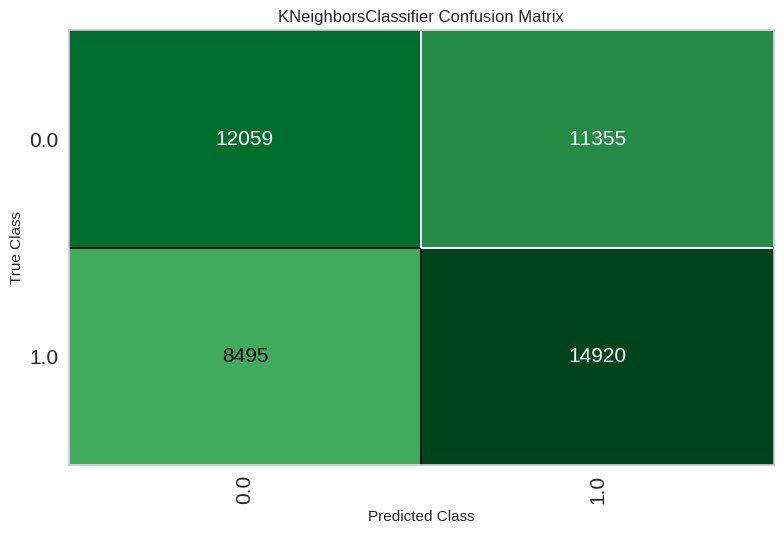

In [7]:
plot_model(knn, plot = 'confusion_matrix')

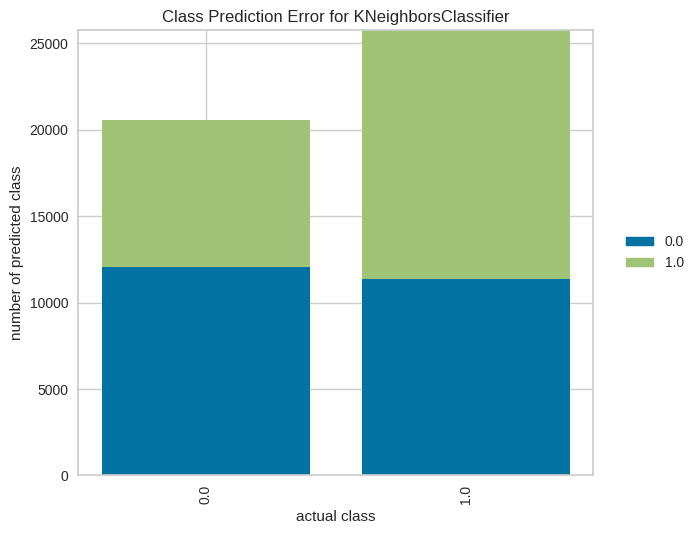

In [8]:
plot_model(knn, plot = 'error')

In [9]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [10]:
knn_val_pred = predict_model(knn, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5781,0.6123,0.6377,0.5698,0.6019,0.1563,0.1574


In [11]:
knn_val_pred = predict_model(knn, data=embval)

In [12]:
save_model(knn, 'models_classif/convkb/binary_scores_val/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
    

# Naive Bayes

In [13]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5449,0.5679,0.9974,0.5236,0.6867,0.0898,0.2112
1,0.5398,0.5754,0.9974,0.5208,0.6843,0.0795,0.1975
2,0.5415,0.5789,0.9982,0.5217,0.6853,0.0831,0.2040
3,0.5427,0.5701,0.9987,0.5223,0.6859,0.0853,0.2081
4,0.5393,0.5746,0.9969,0.5205,0.6839,0.0785,0.1949
5,0.5380,0.5767,0.9979,0.5198,0.6836,0.0760,0.1936
6,0.5400,0.5705,0.9983,0.5208,0.6845,0.0800,0.2000
7,0.5452,0.5729,0.9971,0.5237,0.6867,0.0904,0.2113
8,0.5419,0.5723,0.9981,0.5219,0.6854,0.0839,0.2048


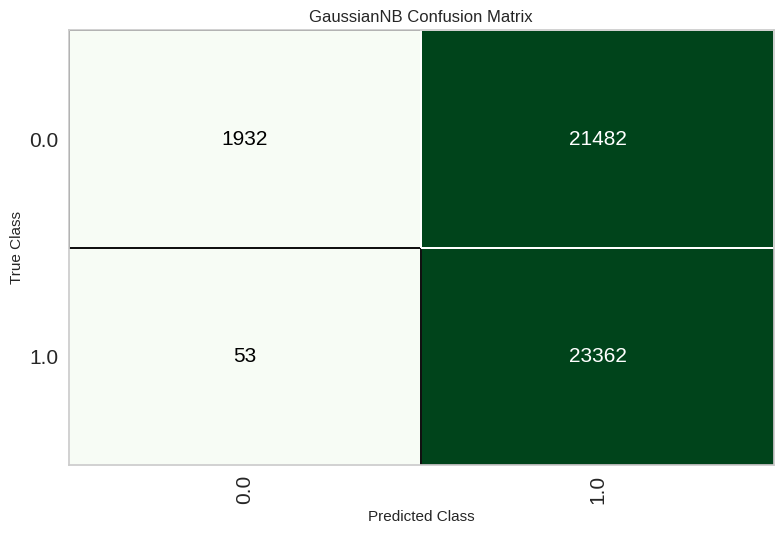

In [14]:
plot_model(nb, plot = 'confusion_matrix')

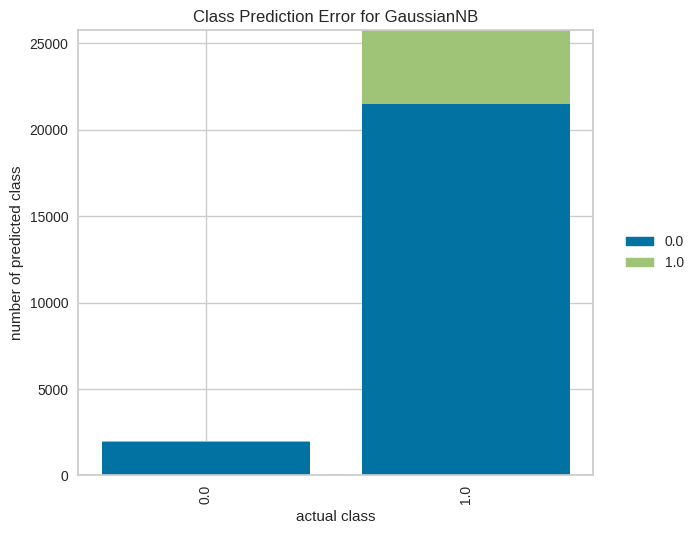

In [15]:
plot_model(nb, plot = 'error')

In [16]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [17]:
nb_val_pred = predict_model(nb, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5422,0.5695,0.9965,0.5221,0.6852,0.0844,0.2021


In [18]:
nb_val_pred = predict_model(nb, data=embval)

In [19]:
save_model(nb, 'models_classif/convkb/binary_scores_val/nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                             

# Decision Tree Classifier

In [20]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5836,0.5832,0.9127,0.5504,0.6867,0.1672,0.2221
1,0.5854,0.5819,0.9206,0.5511,0.6895,0.1708,0.2302
2,0.5876,0.5810,0.9150,0.5529,0.6893,0.1751,0.2317
3,0.5899,0.5890,0.9185,0.5542,0.6913,0.1797,0.2385
4,0.5865,0.5807,0.9146,0.5523,0.6887,0.1730,0.2293
5,0.5874,0.5837,0.9210,0.5524,0.6906,0.1747,0.2346
6,0.5873,0.5805,0.9199,0.5524,0.6903,0.1746,0.2338
7,0.5891,0.5811,0.9156,0.5539,0.6903,0.1783,0.2354
8,0.5856,0.5814,0.9101,0.5519,0.6871,0.1712,0.2251


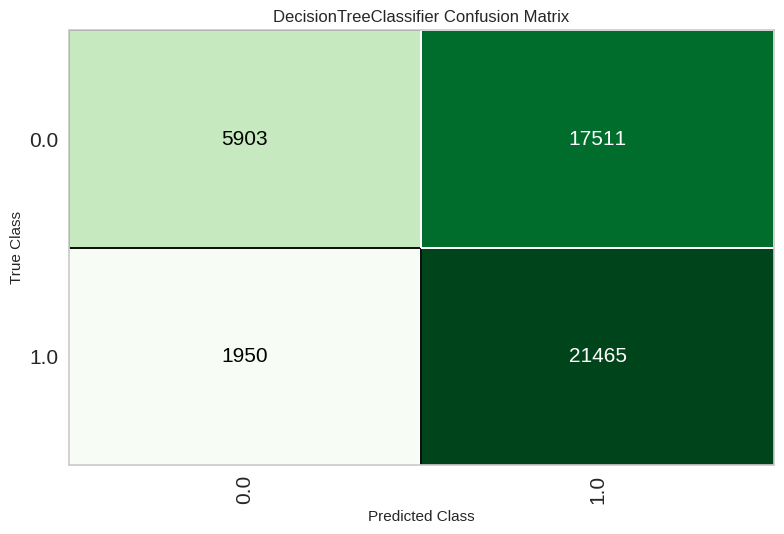

In [21]:
plot_model(dt, plot = 'confusion_matrix')

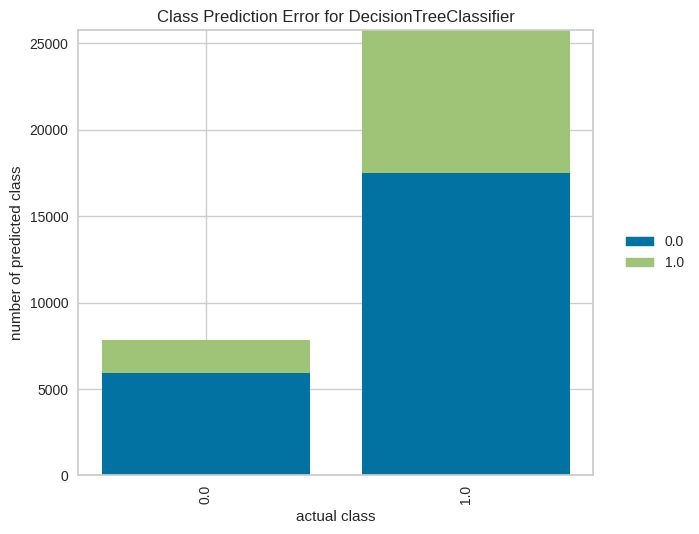

In [22]:
plot_model(dt, plot = 'error')

In [23]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [24]:
dt_val_pred = predict_model(dt, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5855,0.5828,0.9153,0.5515,0.6883,0.1709,0.2274


In [25]:
dt_val_pred = predict_model(dt, data=embval)

In [26]:
save_model(dt, 'models_classif/convkb/binary_scores_val/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features=None, max_leaf_nodes=None,
                    

# SVM - Linear Kernel

In [27]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5195,0.0000,0.9993,0.5100,0.6753,0.0391,0.1386
1,0.5198,0.0000,0.9991,0.5101,0.6754,0.0395,0.1390
2,0.5206,0.0000,0.9993,0.5105,0.6758,0.0412,0.1425
3,0.5228,0.0000,0.9993,0.5117,0.6768,0.0455,0.1502
4,0.5212,0.0000,0.9991,0.5108,0.6760,0.0423,0.1442
5,0.5205,0.0000,0.9997,0.5105,0.6759,0.0410,0.1436
6,0.5192,0.0000,0.9996,0.5098,0.6752,0.0384,0.1385
7,0.5214,0.0000,0.9995,0.5109,0.6762,0.0429,0.1463
8,0.5212,0.0000,0.9996,0.5108,0.6761,0.0425,0.1459


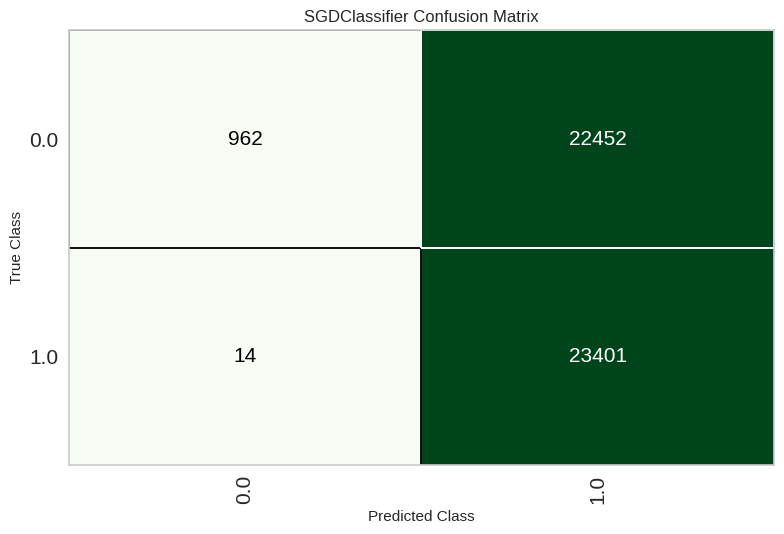

In [28]:
plot_model(svm, plot = 'confusion_matrix')

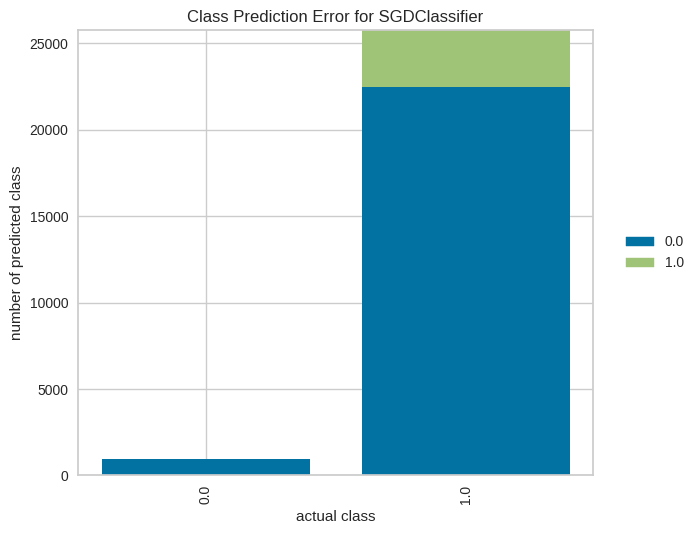

In [29]:
plot_model(svm, plot = 'error')

In [30]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [31]:
svm_val_pred = predict_model(svm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5211,0.5211,0.9979,0.5108,0.6757,0.0423,0.1404


In [32]:
svm_val_pred = predict_model(svm, data=embval)

In [33]:
save_model(svm, 'models_classif/convkb/binary_scores_val/svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='hinge',
                                max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              

# Ridge Classifier

In [34]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5358,0.0000,0.9935,0.5187,0.6815,0.0715,0.1777
1,0.5359,0.0000,0.9932,0.5187,0.6815,0.0717,0.1774
2,0.5364,0.0000,0.9940,0.5190,0.6819,0.0727,0.1806
3,0.5384,0.0000,0.9951,0.5201,0.6831,0.0768,0.1886
4,0.5355,0.0000,0.9926,0.5185,0.6812,0.0709,0.1751
5,0.5355,0.0000,0.9940,0.5185,0.6815,0.0709,0.1779
6,0.5362,0.0000,0.9938,0.5189,0.6818,0.0724,0.1796
7,0.5377,0.0000,0.9923,0.5197,0.6822,0.0754,0.1811
8,0.5383,0.0000,0.9941,0.5200,0.6828,0.0765,0.1863


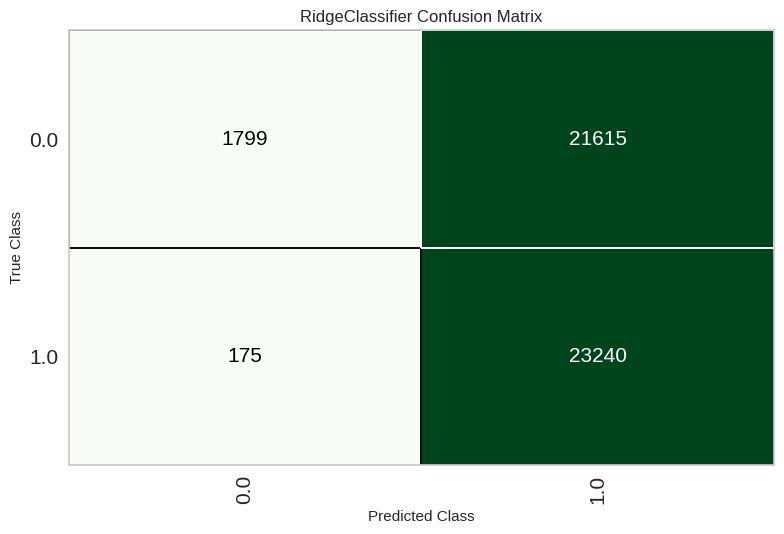

In [35]:
plot_model(ridge, plot = 'confusion_matrix')

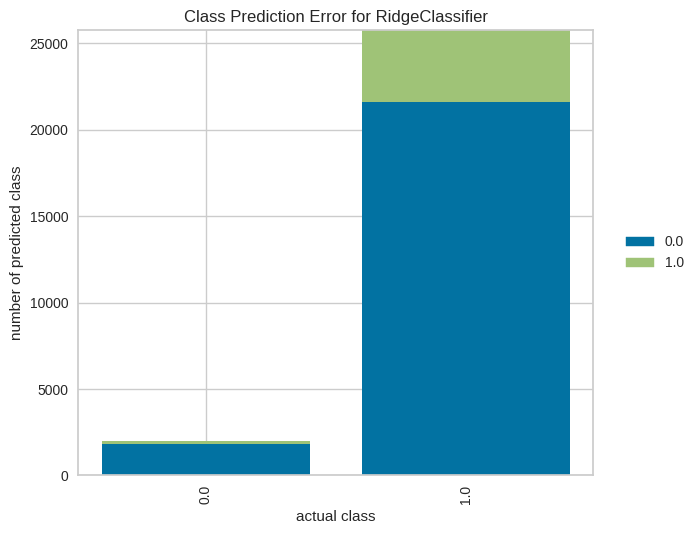

In [36]:
plot_model(ridge, plot = 'error')

In [37]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,7572
solver,auto
tol,0.0001


In [38]:
ridge_val_pred = predict_model(ridge, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5368,0.5368,0.9918,0.5193,0.6816,0.0736,0.1775


In [39]:
ridge_val_pred = predict_model(ridge, data=embval)

In [40]:
save_model(ridge, 'models_classif/convkb/binary_scores_val/ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
    

# Random Forest

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5892,0.6047,0.9049,0.5547,0.6878,0.1784,0.2301
1,0.5933,0.6087,0.9101,0.5571,0.6912,0.1866,0.2412
2,0.5975,0.6096,0.9070,0.5602,0.6926,0.1951,0.2484
3,0.5956,0.6104,0.9071,0.5589,0.6917,0.1912,0.2444
4,0.5998,0.6146,0.9120,0.5614,0.6950,0.1995,0.2554
5,0.5957,0.6091,0.9134,0.5585,0.6932,0.1914,0.2478
6,0.5978,0.6088,0.9137,0.5599,0.6944,0.1957,0.2525
7,0.5981,0.6167,0.9060,0.5607,0.6927,0.1962,0.2491
8,0.5970,0.6108,0.9009,0.5603,0.6909,0.1941,0.2444


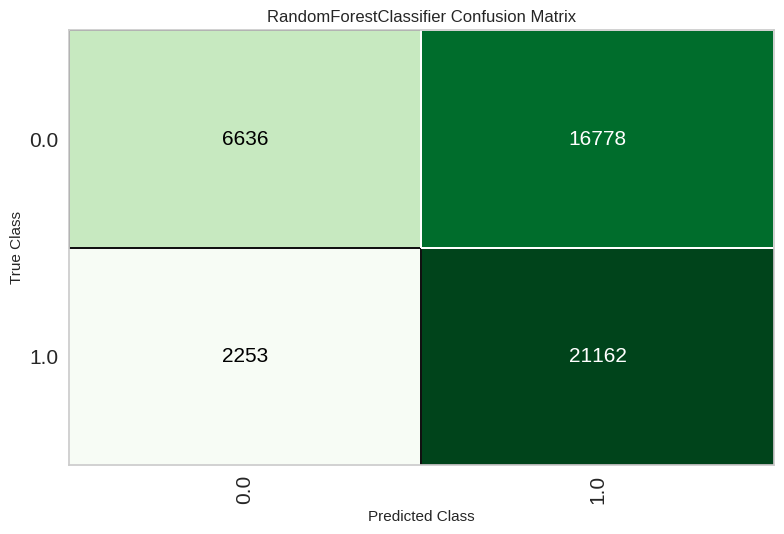

In [42]:
plot_model(rf, plot = 'confusion_matrix')

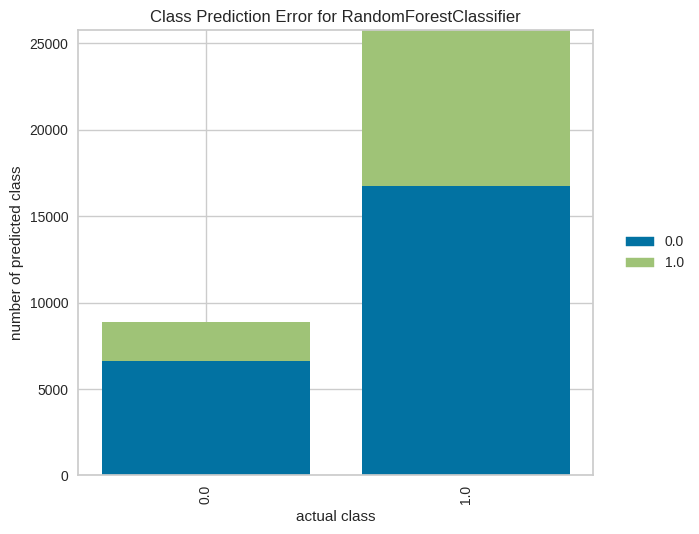

In [43]:
plot_model(rf, plot = 'error')

In [44]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [45]:
rf_val_pred = predict_model(rf, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5937,0.6088,0.9018,0.5580,0.6894,0.1874,0.2379


In [46]:
rf_val_pred = predict_model(rf, data=embval)

In [47]:
save_model(rf, 'models_classif/convkb/binary_scores_val/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
             

# Quadratic Discriminant Analysis

In [48]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5456,0.5548,0.9975,0.5240,0.6871,0.0913,0.2133
1,0.5399,0.5482,0.9975,0.5208,0.6844,0.0799,0.1982
2,0.5419,0.5545,0.9985,0.5219,0.6855,0.0837,0.2055
3,0.5431,0.5555,0.9988,0.5226,0.6862,0.0862,0.2095
4,0.5392,0.5503,0.9971,0.5205,0.6839,0.0783,0.1951
5,0.5381,0.5505,0.9982,0.5199,0.6837,0.0762,0.1947
6,0.5398,0.5530,0.9984,0.5207,0.6845,0.0796,0.1998
7,0.5455,0.5574,0.9978,0.5239,0.6870,0.0910,0.2133
8,0.5418,0.5537,0.9982,0.5219,0.6854,0.0837,0.2048


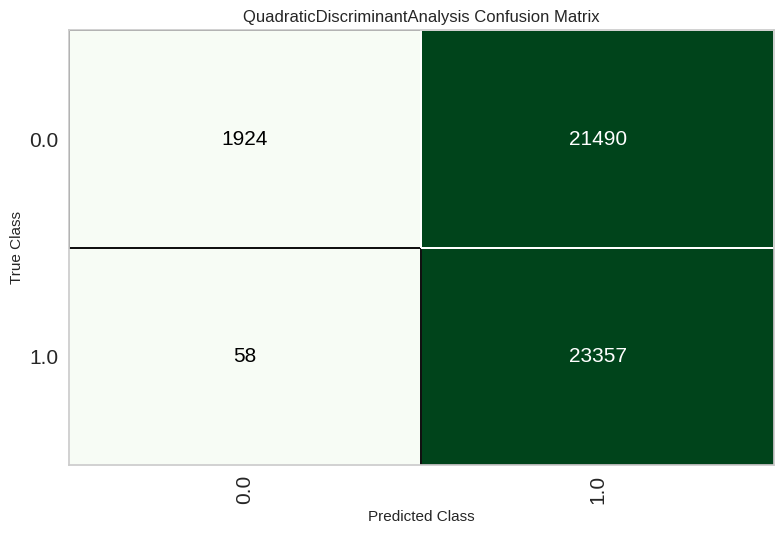

In [49]:
plot_model(qda, plot = 'confusion_matrix')

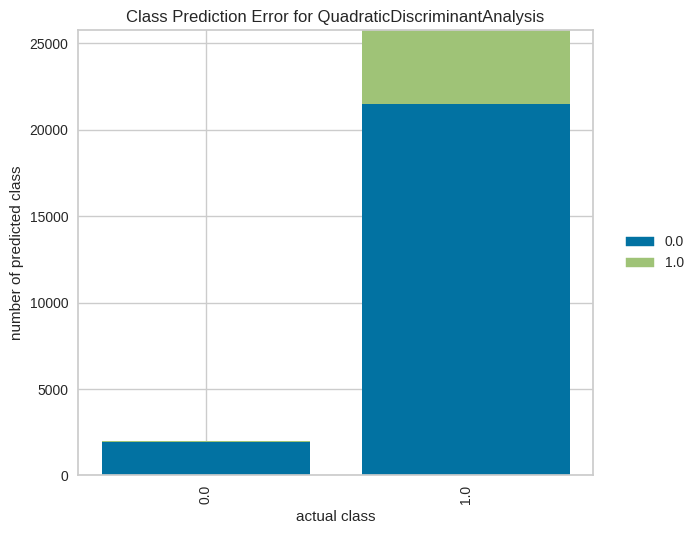

In [50]:
plot_model(qda, plot = 'error')

In [51]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [52]:
qda_val_pred = predict_model(qda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.5421,0.5533,0.9966,0.5220,0.6852,0.0841,0.2018


In [53]:
qda_val_pred = predict_model(qda, data=embval)

In [54]:
save_model(qda, 'models_classif/convkb/binary_scores_val/qda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',

# Linear Discriminant Analysis

In [55]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5359,0.5859,0.9934,0.5187,0.6816,0.0717,0.1778
1,0.5358,0.5883,0.9930,0.5187,0.6814,0.0716,0.1768
2,0.5364,0.5926,0.9938,0.5190,0.6819,0.0727,0.1801
3,0.5386,0.5907,0.9951,0.5202,0.6832,0.0772,0.1892
4,0.5355,0.5984,0.9925,0.5185,0.6812,0.0709,0.1749
5,0.5355,0.5903,0.9940,0.5185,0.6816,0.0710,0.1781
6,0.5363,0.5951,0.9938,0.5189,0.6818,0.0726,0.1800
7,0.5377,0.5922,0.9923,0.5197,0.6822,0.0755,0.1812
8,0.5384,0.5919,0.9941,0.5201,0.6829,0.0768,0.1866


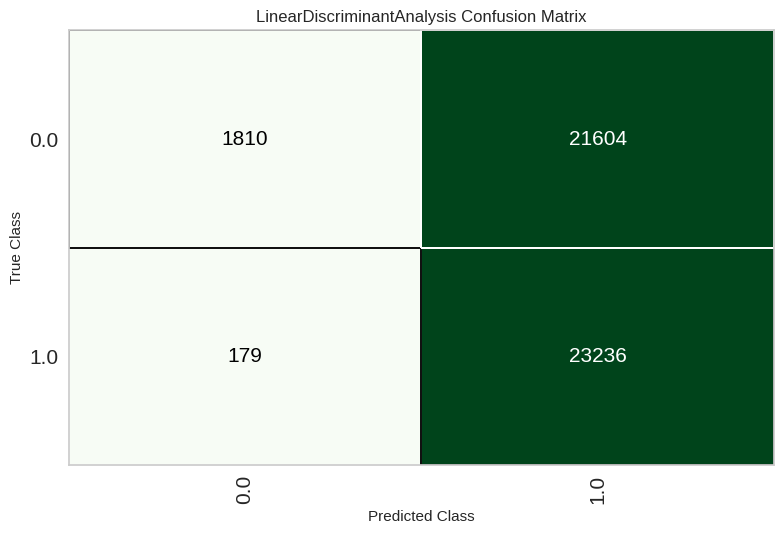

In [56]:
plot_model(lda, plot = 'confusion_matrix')

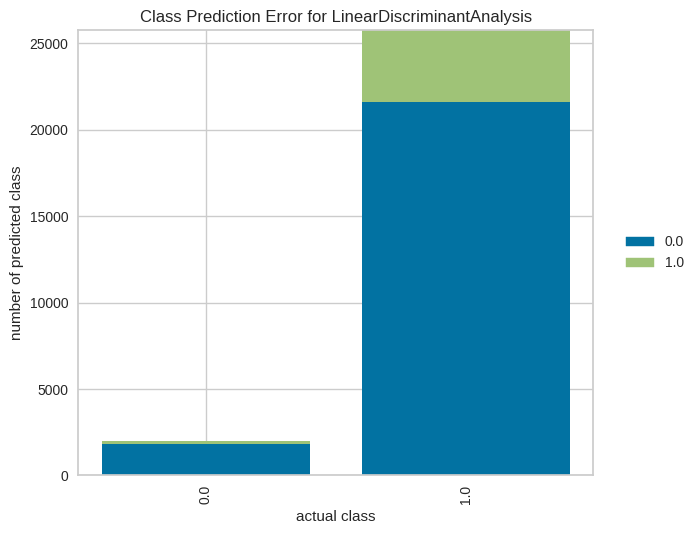

In [57]:
plot_model(lda, plot = 'error')

In [58]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [59]:
lda_val_pred = predict_model(lda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5369,0.5948,0.9917,0.5193,0.6817,0.0737,0.1775


In [60]:
lda_val_pred = predict_model(lda, data=embval)

In [61]:
save_model(lda, 'models_classif/convkb/binary_scores_val/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
    

# Extra Trees

In [62]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6107,0.6475,0.8242,0.5776,0.6792,0.2213,0.2448
1,0.6083,0.6467,0.8325,0.5747,0.6800,0.2165,0.2423
2,0.6152,0.6515,0.8347,0.5801,0.6845,0.2304,0.2564
3,0.6090,0.6421,0.8291,0.5757,0.6796,0.2181,0.2428
4,0.6148,0.6482,0.8315,0.5801,0.6834,0.2296,0.2548
5,0.6092,0.6479,0.8380,0.5749,0.6820,0.2184,0.2456
6,0.6104,0.6450,0.8342,0.5763,0.6816,0.2209,0.2470
7,0.6091,0.6495,0.8230,0.5764,0.6780,0.2182,0.2414
8,0.6079,0.6489,0.8163,0.5762,0.6755,0.2159,0.2375


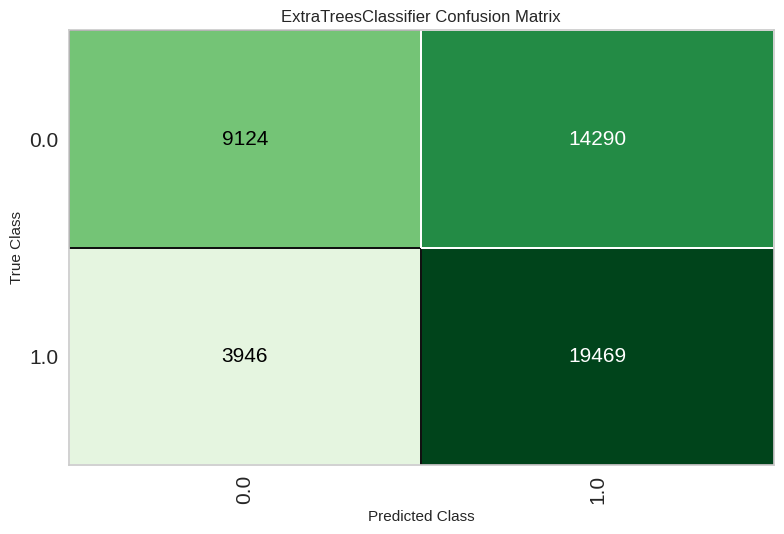

In [63]:
plot_model(et, plot = 'confusion_matrix')

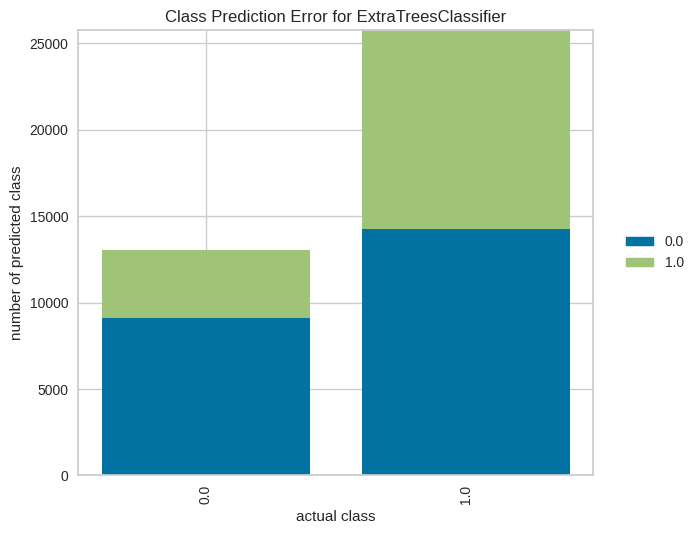

In [64]:
plot_model(et, plot = 'error')

In [65]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [66]:
et_val_pred = predict_model(et, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6084,0.6411,0.8248,0.5757,0.6781,0.2169,0.2406


In [67]:
et_val_pred = predict_model(et, data=embval)

In [68]:
save_model(et, 'models_classif/convkb/binary_scores_val/et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                      

# Light Gradient Boosting Machine

In [69]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7134,0.7873,0.8252,0.6744,0.7422,0.4269,0.4379
1,0.7204,0.7887,0.8330,0.6799,0.7487,0.4407,0.4524
2,0.7259,0.7960,0.8305,0.6869,0.7519,0.4518,0.4621
3,0.7234,0.7892,0.8308,0.6839,0.7502,0.4468,0.4575
4,0.7189,0.7873,0.8280,0.6797,0.7466,0.4378,0.4486
5,0.7228,0.7933,0.8343,0.6821,0.7506,0.4455,0.4570
6,0.7154,0.7875,0.8283,0.6758,0.7443,0.4309,0.4423
7,0.7209,0.7894,0.8237,0.6833,0.7469,0.4419,0.4515
8,0.7212,0.7894,0.8328,0.6808,0.7492,0.4424,0.4539


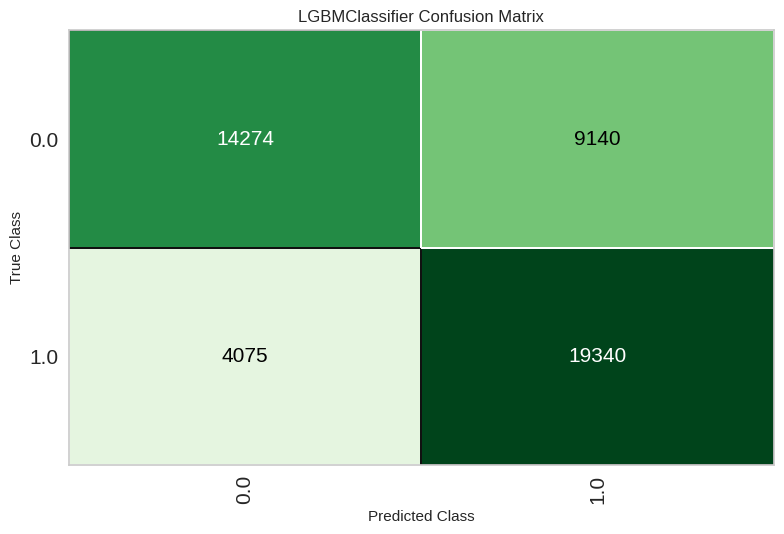

In [70]:
plot_model(lightgbm, plot = 'confusion_matrix')

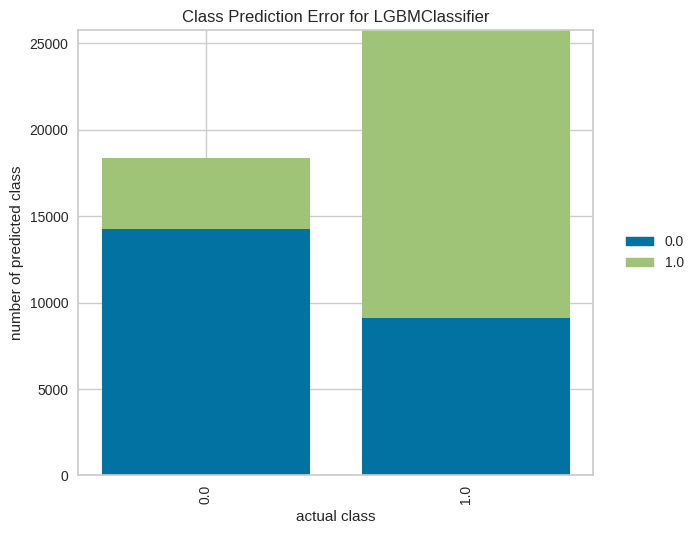

In [71]:
plot_model(lightgbm, plot = 'error')

In [72]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [73]:
lgbm_val_pred = predict_model(lightgbm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7130,0.7775,0.8107,0.6782,0.7386,0.4261,0.4344


In [74]:
lgbm_val_pred = predict_model(lightgbm, data=embval)

In [75]:
save_model(lightgbm, 'models_classif/convkb/binary_scores_val/lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100, n_jobs=-1,
        

# MLP Classifier

In [76]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5712,0.5907,0.9391,0.5410,0.6865,0.1423,0.2102
1,0.5729,0.5924,0.9436,0.5418,0.6884,0.1457,0.2172
2,0.5756,0.5990,0.9529,0.5431,0.6919,0.1512,0.2304
3,0.5791,0.5966,0.9244,0.5468,0.6872,0.1583,0.2188
4,0.5870,0.6042,0.8945,0.5539,0.6842,0.1741,0.2207
5,0.5803,0.5962,0.9201,0.5478,0.6868,0.1606,0.2190
6,0.5076,0.5990,0.0409,0.6128,0.0767,0.0151,0.0419
7,0.5817,0.5960,0.9190,0.5488,0.6872,0.1634,0.2214
8,0.5796,0.5971,0.9353,0.5465,0.6899,0.1593,0.2266


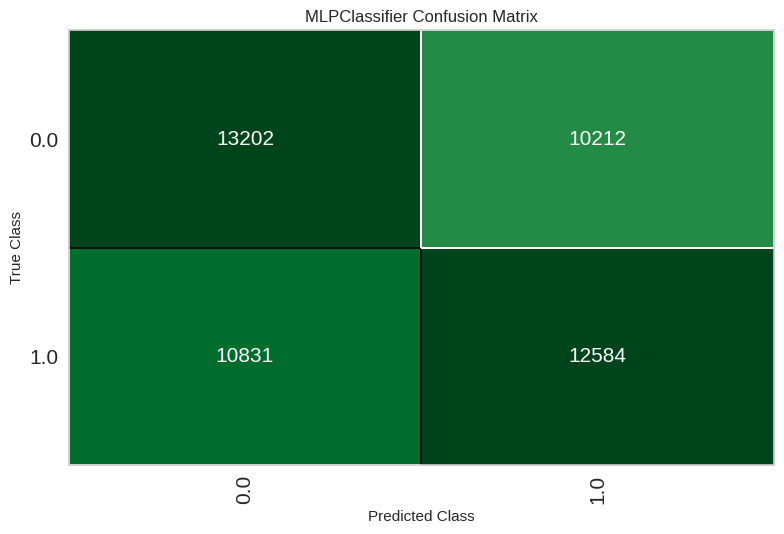

In [77]:
plot_model(mlp, plot = 'confusion_matrix')

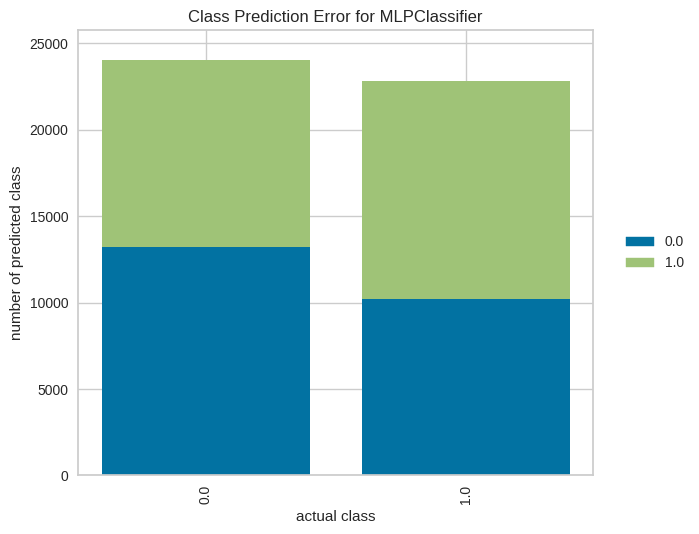

In [78]:
plot_model(mlp, plot = 'error')

In [79]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [80]:
mlp_val_pred = predict_model(mlp, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.5545,0.5990,0.5443,0.5556,0.5499,0.1090,0.1090


In [81]:
mlp_val_pred = predict_model(mlp, data=embval)

In [82]:
save_model(mlp, 'models_classif/convkb/binary_scores_val/mlp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/resource/SIO_001279',
                                              'http://www.semanticweb.org/needed-terms#001',
                                              'http://www.semanticweb.org/needed-term...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                                learning_rate_init=0.001, max_fun=15000,
                                max_iter=500, momentu